## Plotting Functions in PIASO

This notebook will demonstrate the different plotting functions and their application to sample data.

In [1]:
path = '/data1/vallaris/Analysis/Python/Packages/PIASO'
import sys
sys.path.append(path)

In [2]:
import importlib
from scipy import sparse
import piaso
import scanpy as sc

In [3]:
sc.set_figure_params(dpi=80,dpi_save=300, color_map='viridis',facecolor='white')
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
save_dir='/data1/vallaris/Results/single-cell/Methods/PIASO'
sc.settings.figdir = save_dir
prefix='GitHub_testing'

### Load the data

The 20k subsampled snRNA-seq data from Allen SEA-AD project is available in google drive: https://drive.google.com/file/d/1nH-CRaTQFxJ5pAVpy8_hUQn1nrIcakq2/view?usp=drive_link.

The original data is available in https://portal.brain-map.org/explore/seattle-alzheimers-disease.

In [4]:
adata=sc.read('/data1/vallaris/Analysis/Python/Packages/PIASO_Testing/SEA-AD_RNA_MTG_subsample_excludeReference_20k_piaso.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 20000 × 36601
    obs: 'sample_id', 'Neurotypical reference', 'Donor ID', 'Organism', 'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in mont

### Visualizing with a discrete color map

The discrete color map can be used to visualize the categorical variables such as cell subclass.

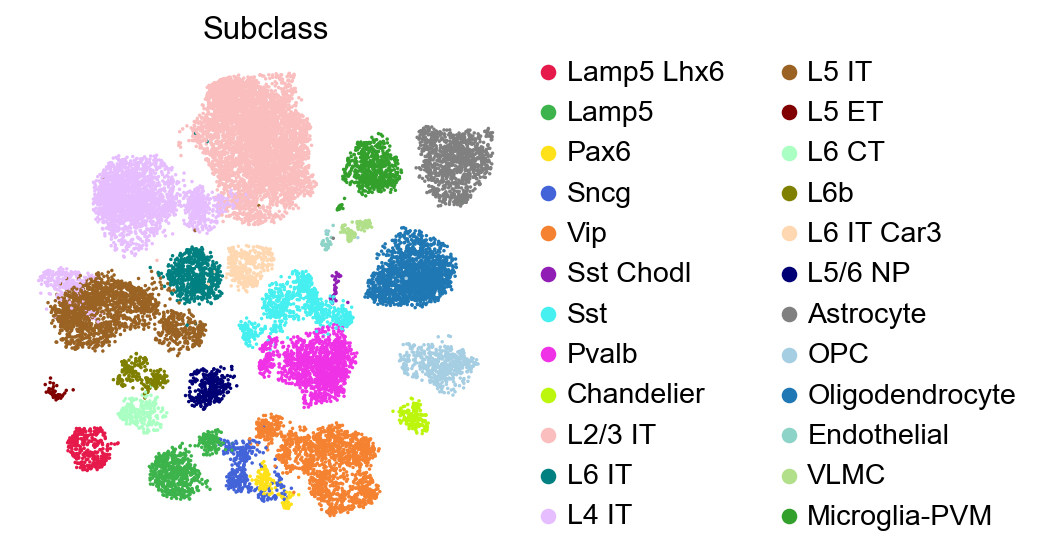

In [6]:
sc.pl.embedding(adata,
                basis='X_umap',
                color=['Subclass'],
                palette=piaso.pl.color.d_color3,
                legend_fontoutline=2,
                legend_fontweight=5,
                cmap='Spectral_r',
                ncols=3,
                size=10,
                frameon=False)

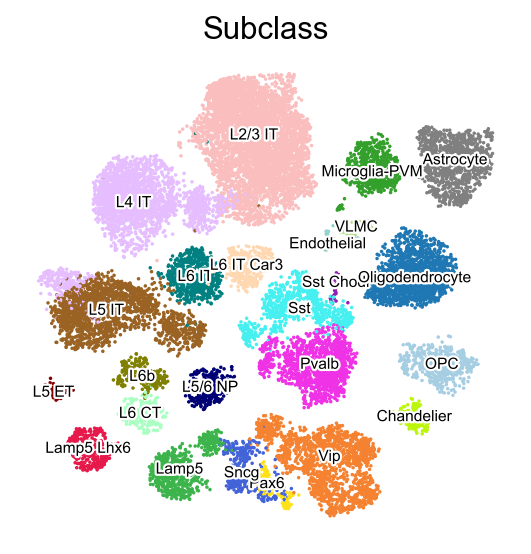

In [7]:
sc.pl.embedding(adata,
                basis='X_umap',
                color=['Subclass'],
                palette=piaso.pl.color.d_color3,
                legend_fontoutline=2,
                legend_fontsize=7,
                legend_fontweight=5,
                legend_loc='on data',
                cmap='Spectral_r',
                size=10,
                frameon=False)

### Visualizing with a continuous color map

The continuous color map can be used to visualize the continuous variables such as gene expression.

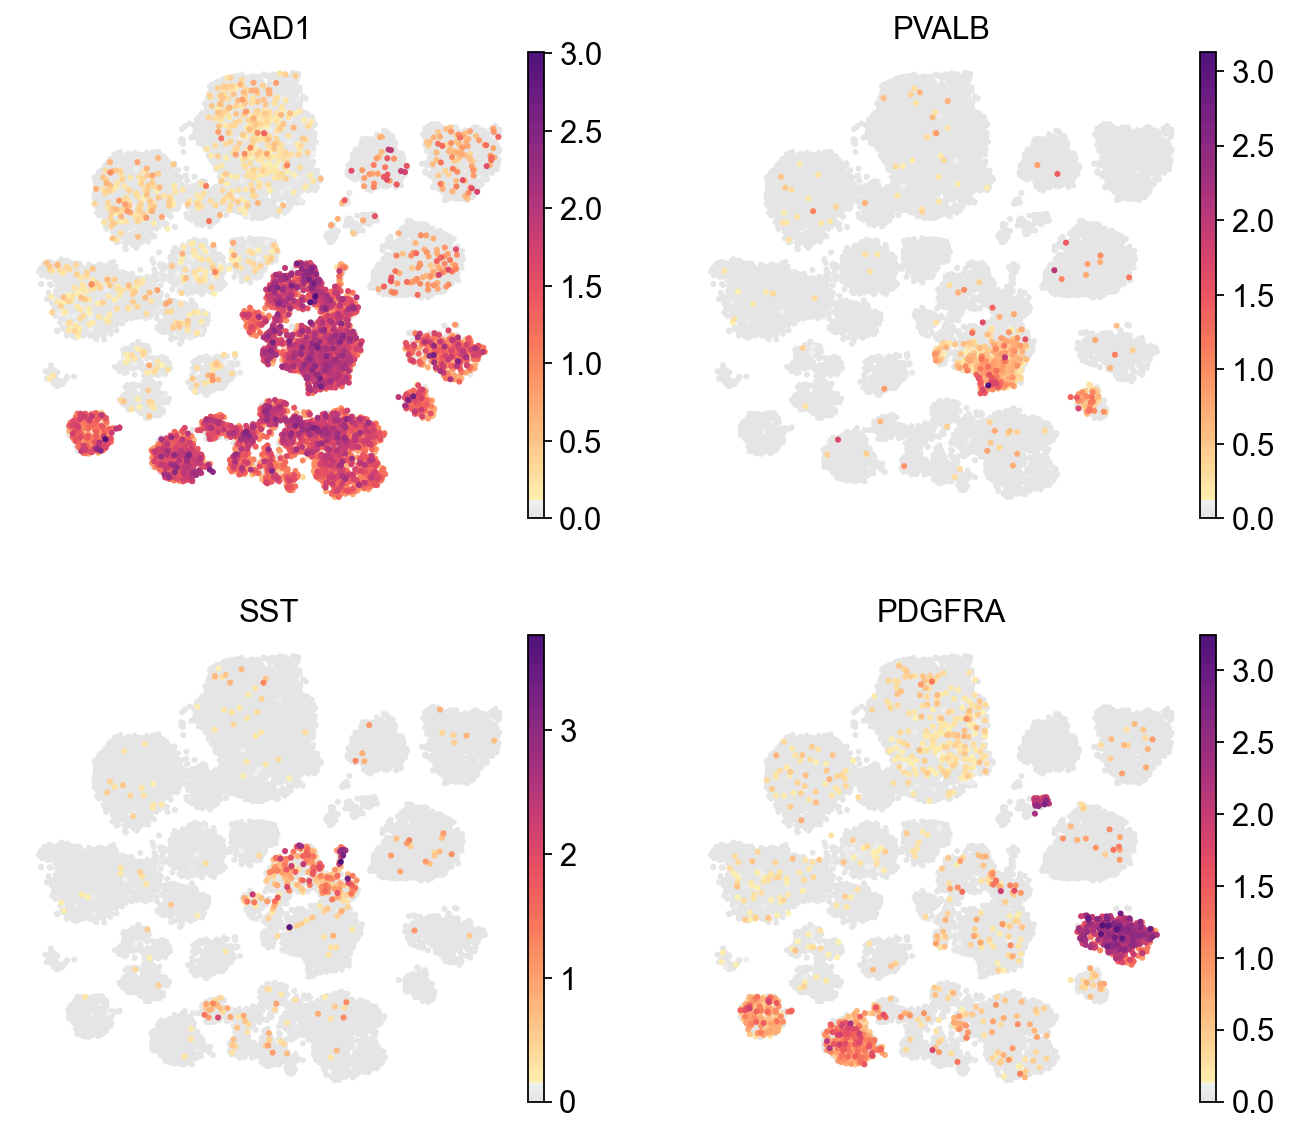

In [8]:
sc.pl.umap(adata,
           color=['GAD1', 'PVALB', 'SST', 'PDGFRA'],
           cmap=piaso.pl.color.c_color1,
           legend_fontsize=10,
           legend_fontoutline=3,
           ncols=2,
           size=30,
           frameon=False)

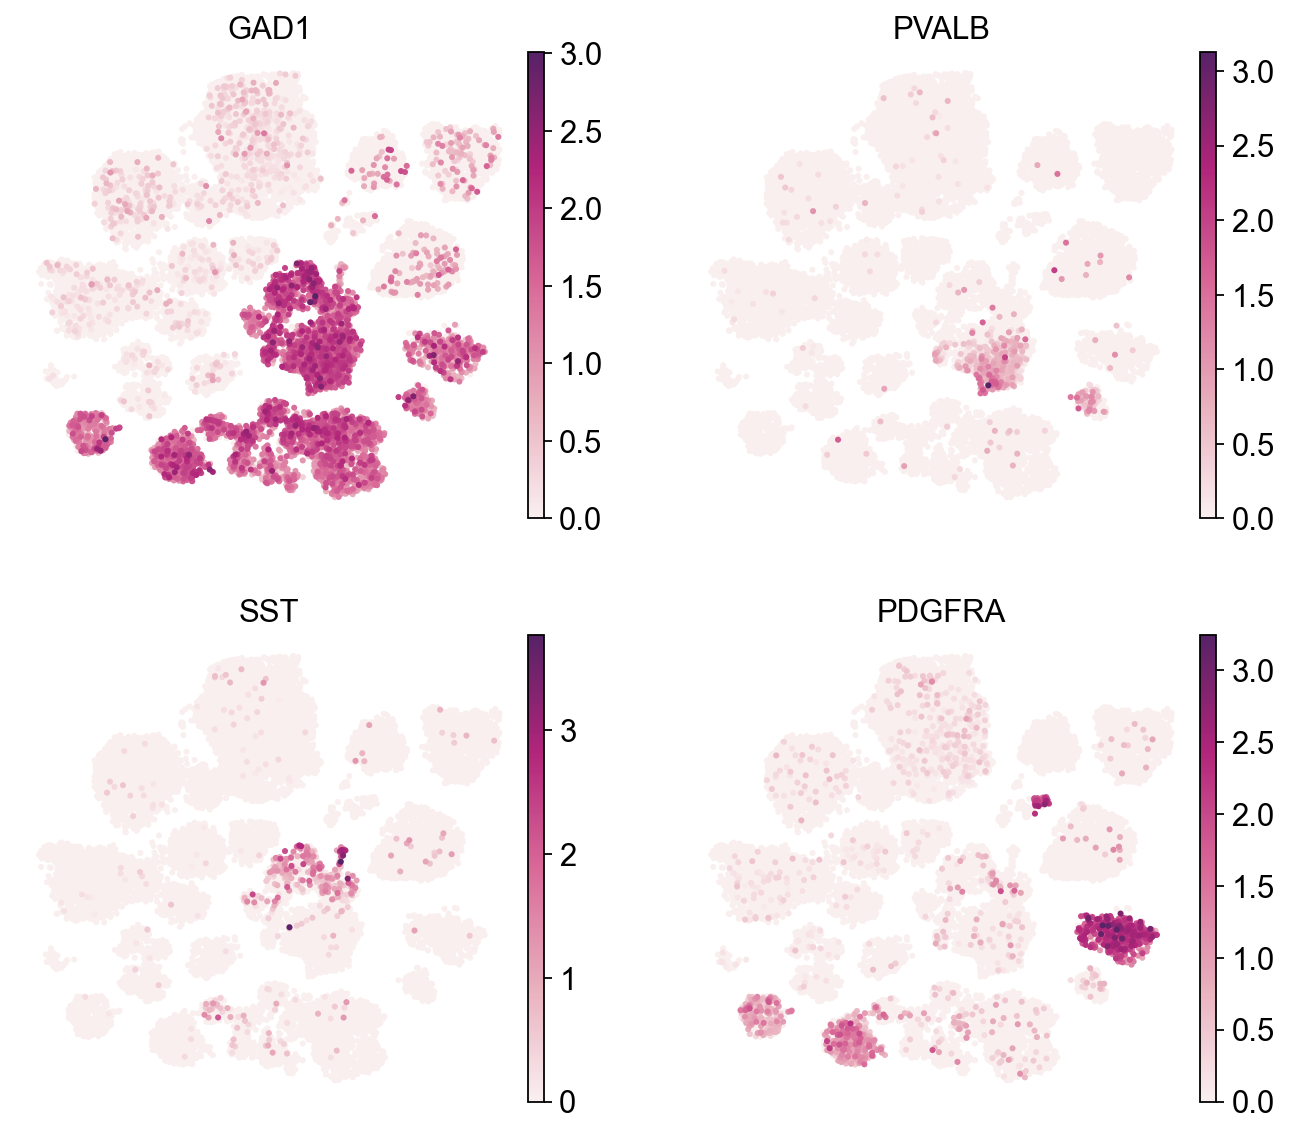

In [9]:
sc.pl.umap(adata,
           color=['GAD1', 'PVALB', 'SST', 'PDGFRA'],
           cmap=piaso.pl.color.c_color4,
           legend_fontsize=10,
           legend_fontoutline=3,
           ncols=2,
           size=30,
           frameon=False)

### Split the UMAP by condition

In [10]:
mapping_dict=dict(zip(adata.obs['CERAD score'], adata.obs['CERAD score']))

In [11]:
mapping_dict={'Absent': 'Absent',
 'Sparse': 'Disease',
 'Moderate': 'Disease',
 'Frequent': 'Disease'}

In [12]:
adata.obs['Condition']=adata.obs['CERAD score'].map(mapping_dict)

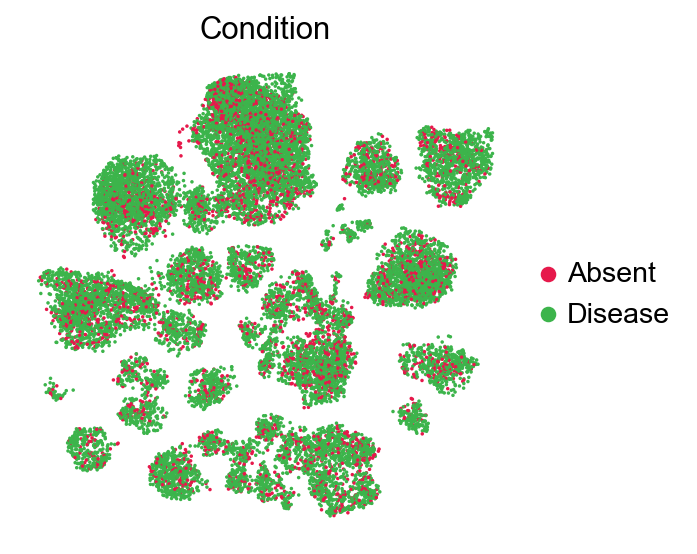

In [13]:
sc.pl.embedding(adata,
                basis='X_umap',
                color=['Condition'],
                palette=piaso.pl.color.d_color1,
                legend_fontoutline=2,
                legend_fontweight=5,
                cmap='Spectral_r',
                size=10,
                frameon=False)

##### Visualizing the expression of a specific gene across two different experimental conditions

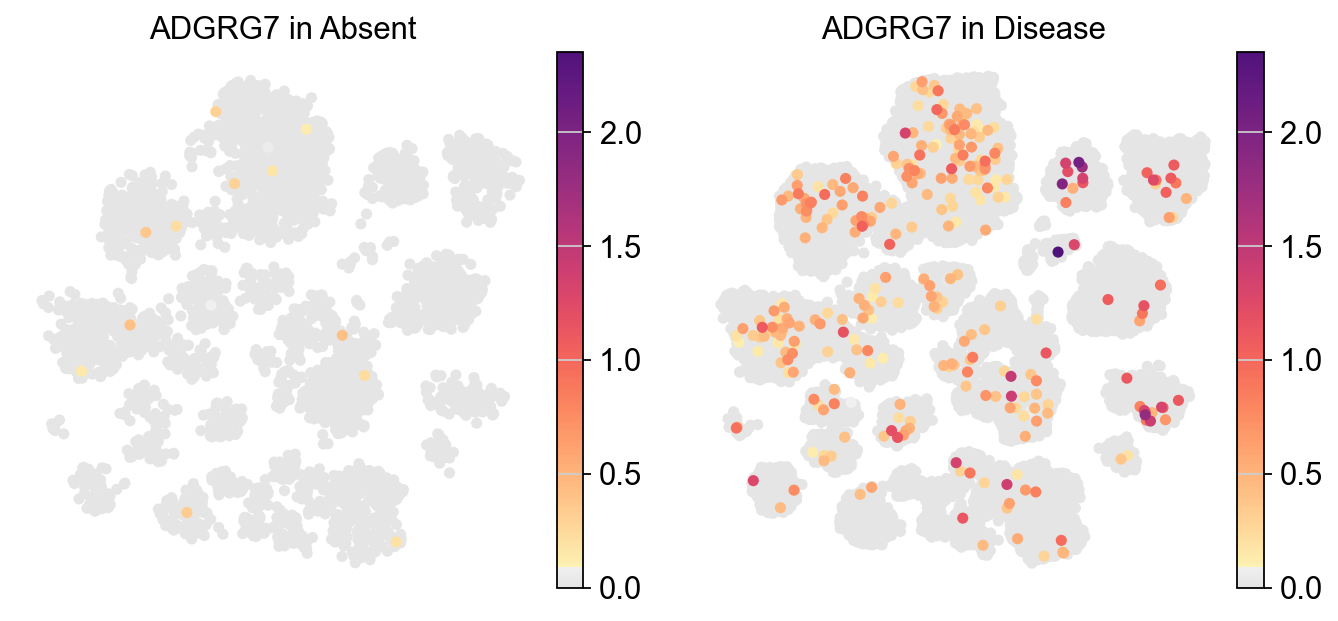

In [14]:
piaso.pl.plot_embeddings_split(adata,
                               color='ADGRG7',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color1,
                               size=100,
                               frameon=False,
                               legend_loc=None,
             )

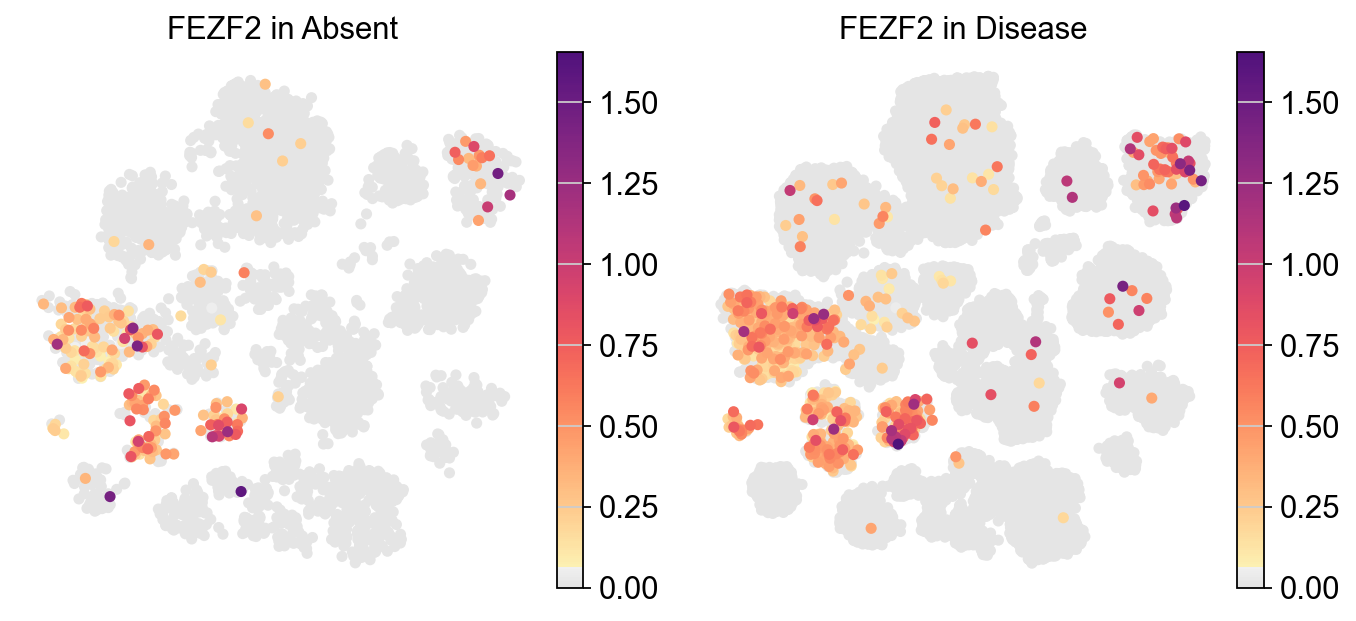

In [15]:
piaso.pl.plot_embeddings_split(adata,
                               color='FEZF2',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color1,
                               size=100,
                               frameon=False,
                               legend_loc=None,
             )

##### Visulaizing continuous variables (Number of UMIs) across different experimental conditions

/data1/vallaris/.conda/envs/vvs/lib/python3.12/site-packages/PIASO-0.1.0-py3.12.egg/piaso/plotting/_plotEmbedding.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


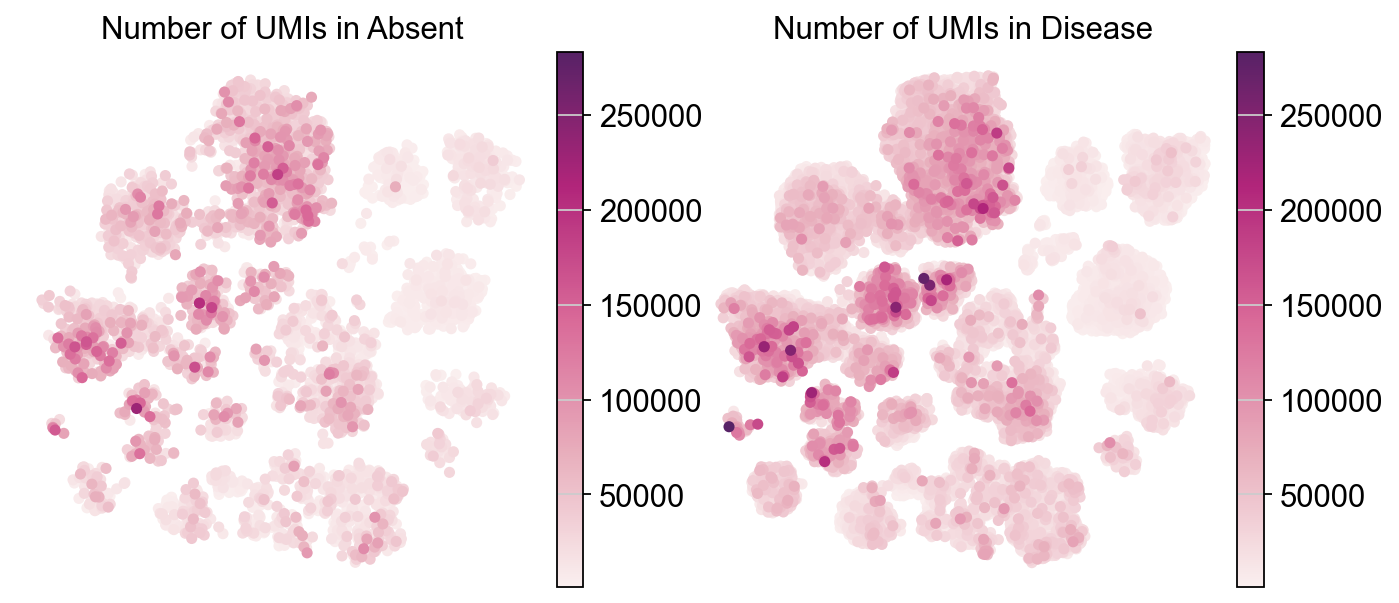

In [16]:
piaso.pl.plot_embeddings_split(adata,
                               color='Number of UMIs',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color4,
                               size=100,
                               frameon=False,
                               legend_loc=None)

##### Visualizing categorical variables (Cell subclass) across different experimental conditions

/data1/vallaris/.conda/envs/vvs/lib/python3.12/site-packages/PIASO-0.1.0-py3.12.egg/piaso/plotting/_plotEmbedding.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


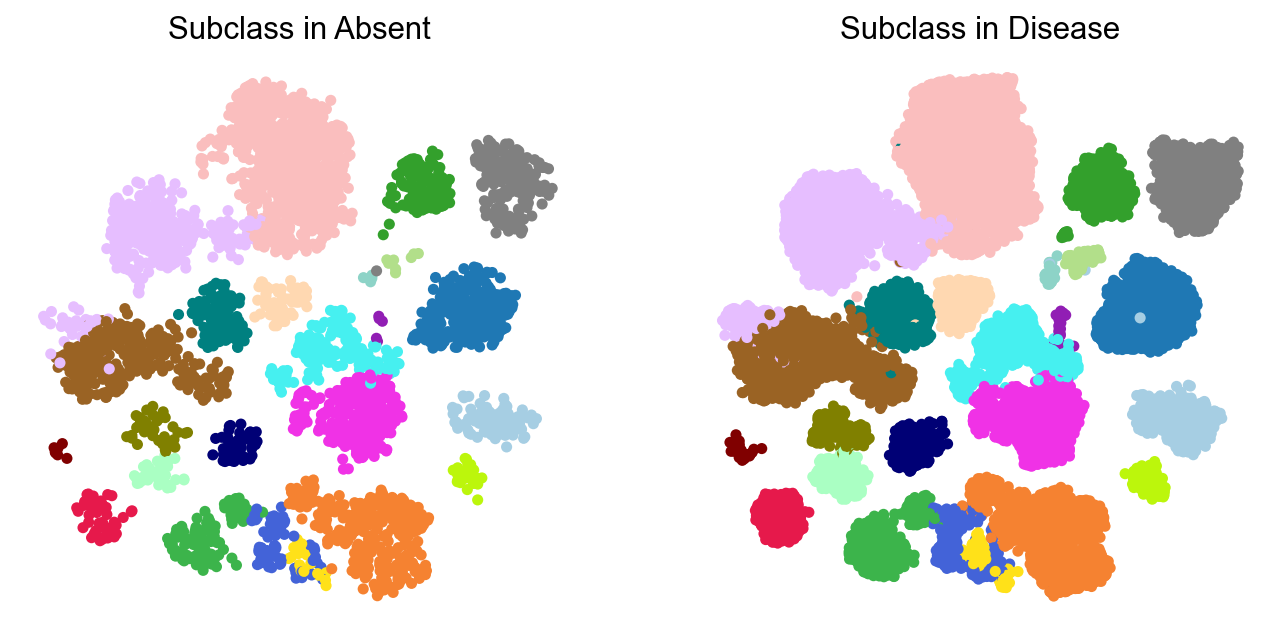

In [17]:
piaso.pl.plot_embeddings_split(adata,
                               color='Subclass',
                               layer=None,
                               splitby='Condition',
                               size=100,
                               frameon=False,
                               legend_loc=None)

/data1/vallaris/.conda/envs/vvs/lib/python3.12/site-packages/PIASO-0.1.0-py3.12.egg/piaso/plotting/_plotEmbedding.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


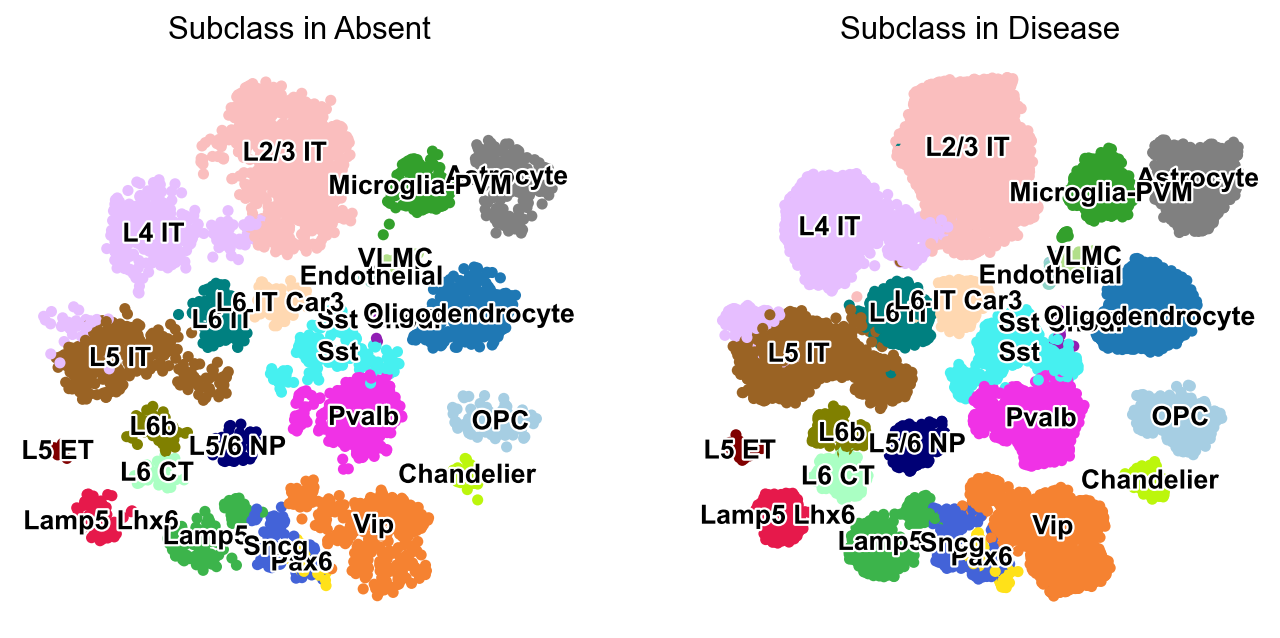

In [18]:
piaso.pl.plot_embeddings_split(adata,
                               color='Subclass',
                               layer=None,
                               splitby='Condition',
                               size=100,
                               frameon=False,
                               legend_loc='on data')

### Violin plots of grouped data
Visulaize how the groups in the dataset vary across a list of different features. Here, you can plot a different subplot for each feature of interest.

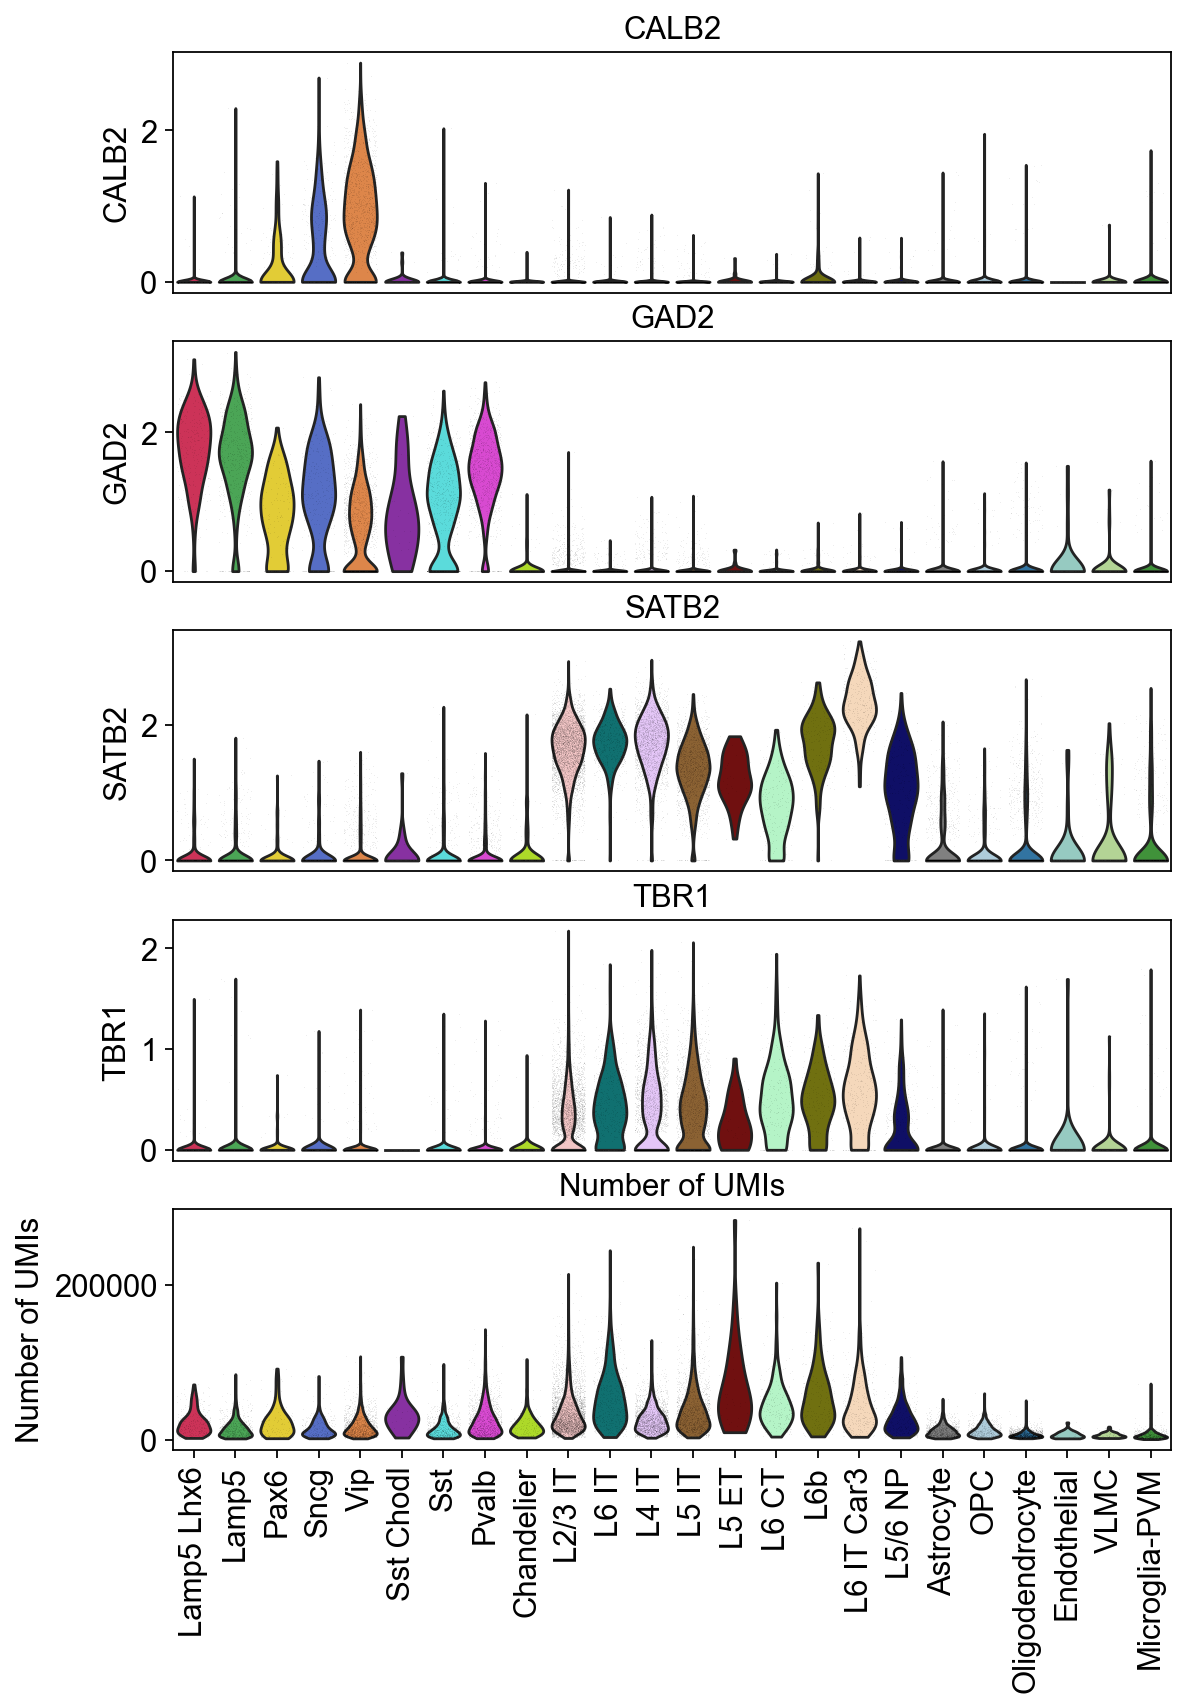

In [19]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
                              width_single=8,
                              height_single=2.3,
                              groupby='Subclass',
                              show_grid=False)

Adding the horizontal grid line

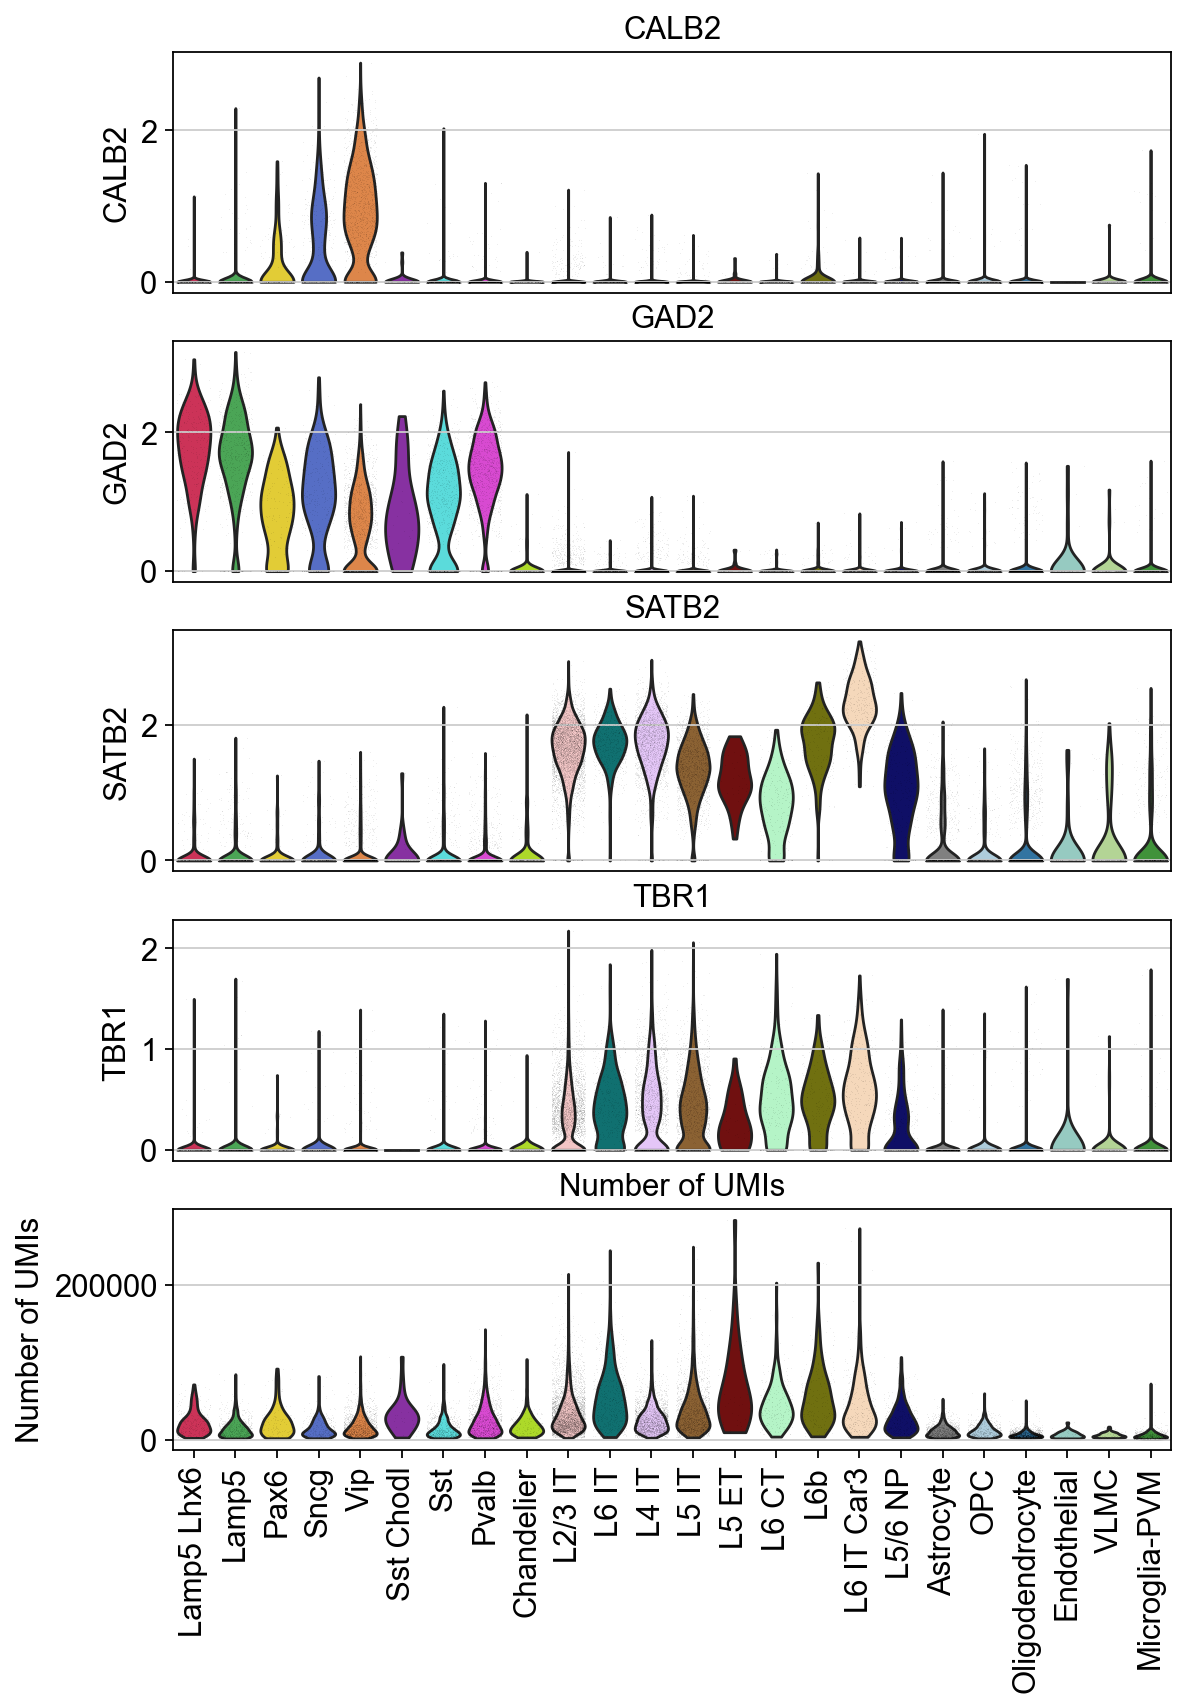

In [20]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
                              width_single=8,
                              height_single=2.3,
                              groupby='Subclass')

The height and widhts of these plots can be adjusted according to the number of features and groups you have for better visualization.

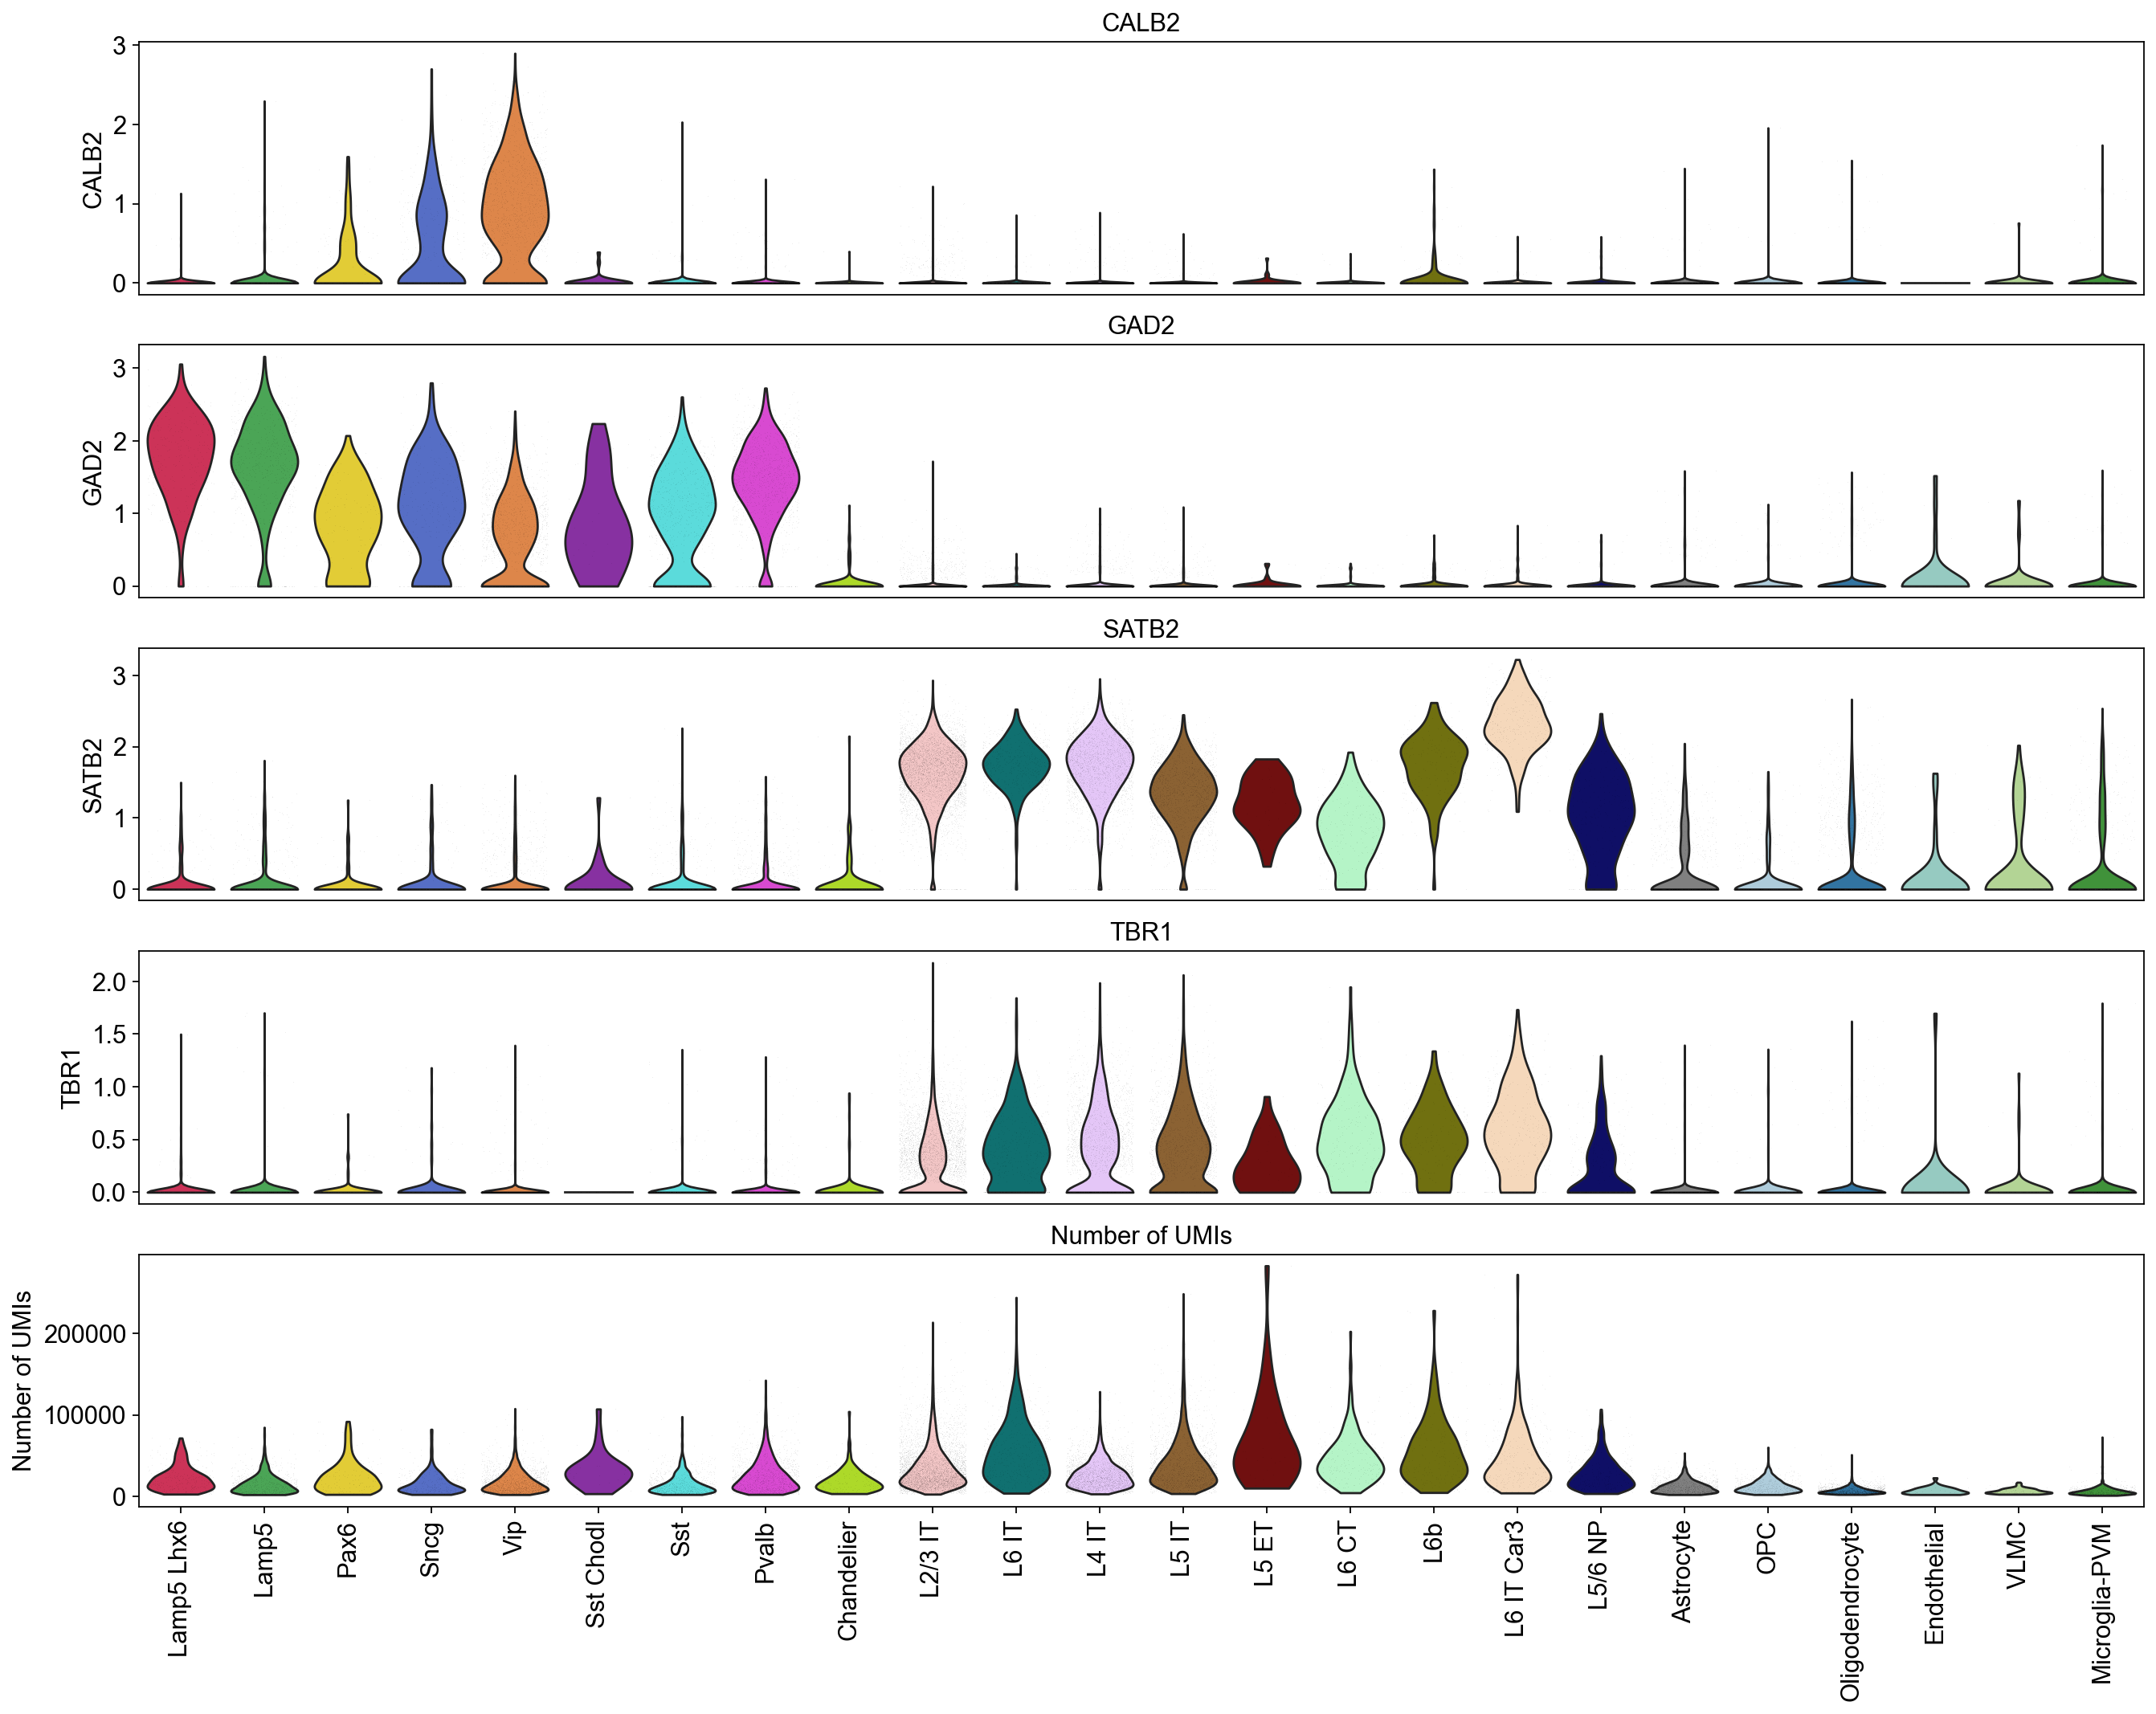

In [21]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
                              width_single=20,
                              height_single=3,
                              groupby='Subclass',
                              show_grid=False)

### Violin plots of entire data

We can visualize the entire dataset as a single group, adjusting the dot size to plot all the cells onto the violin plot.

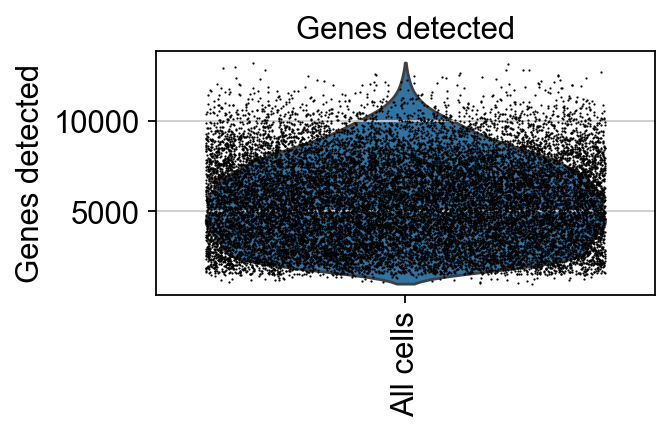

In [22]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'Genes detected'],
                              width_single=4,
                              height_single=2.0,
                              size=1)

We can visualize the distributions of the cells across various features together.

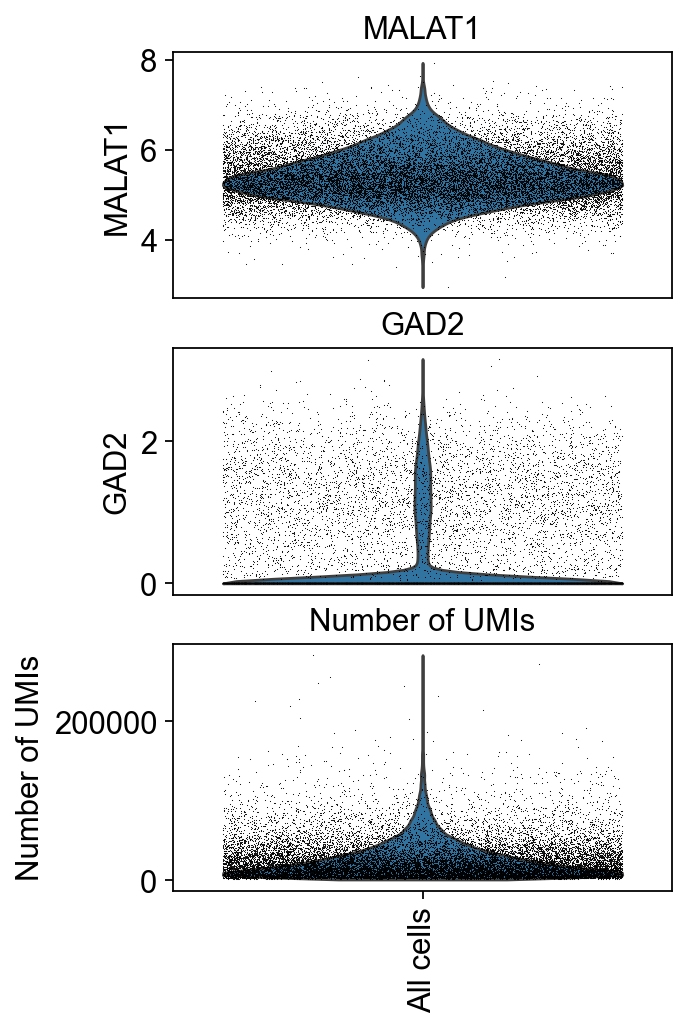

In [23]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'MALAT1', 'GAD2', 'Number of UMIs'],
                              width_single=4,
                              height_single=2.3,
                              size=0.5,
                              show_grid=False)

### Saving output plots as PDF
Use the `save` parameter to specific the file name and path to save:

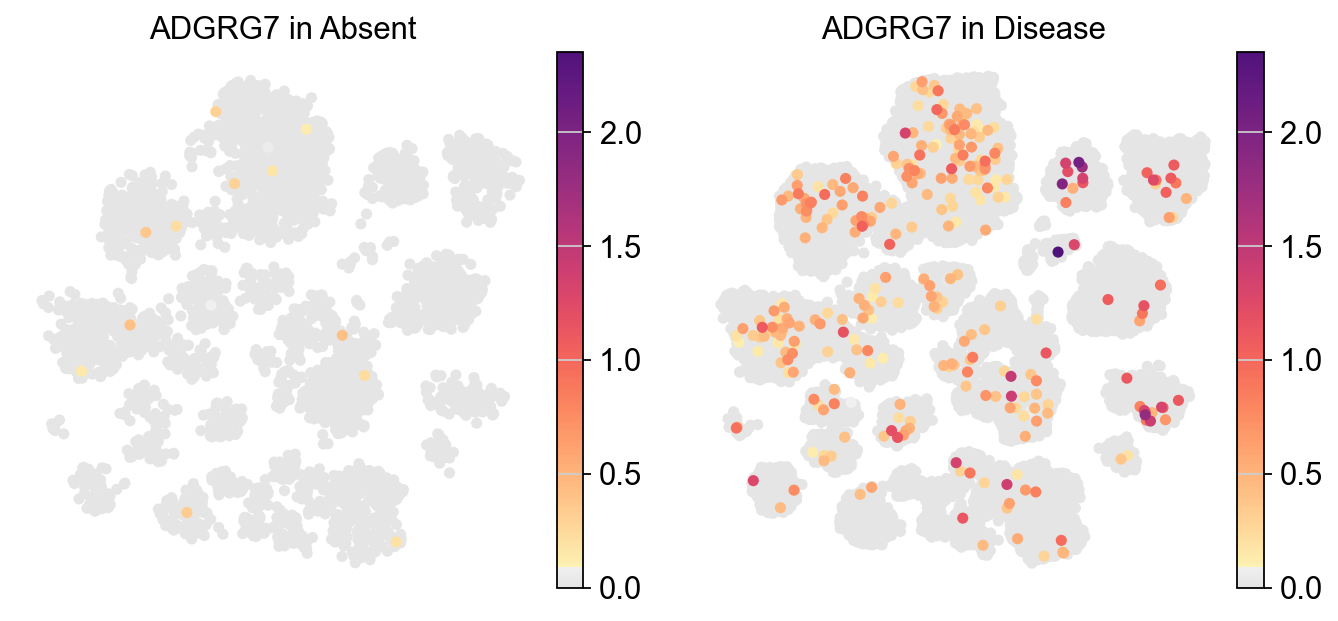

Figure saved to:  ./PIASO_UMAP_split_by_condition.pdf


In [24]:
piaso.pl.plot_embeddings_split(adata,
                               color='ADGRG7',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color1,
                               size=100,
                               frameon=False,
                               legend_loc=None,
                               save='./PIASO_UMAP_split_by_condition.pdf')

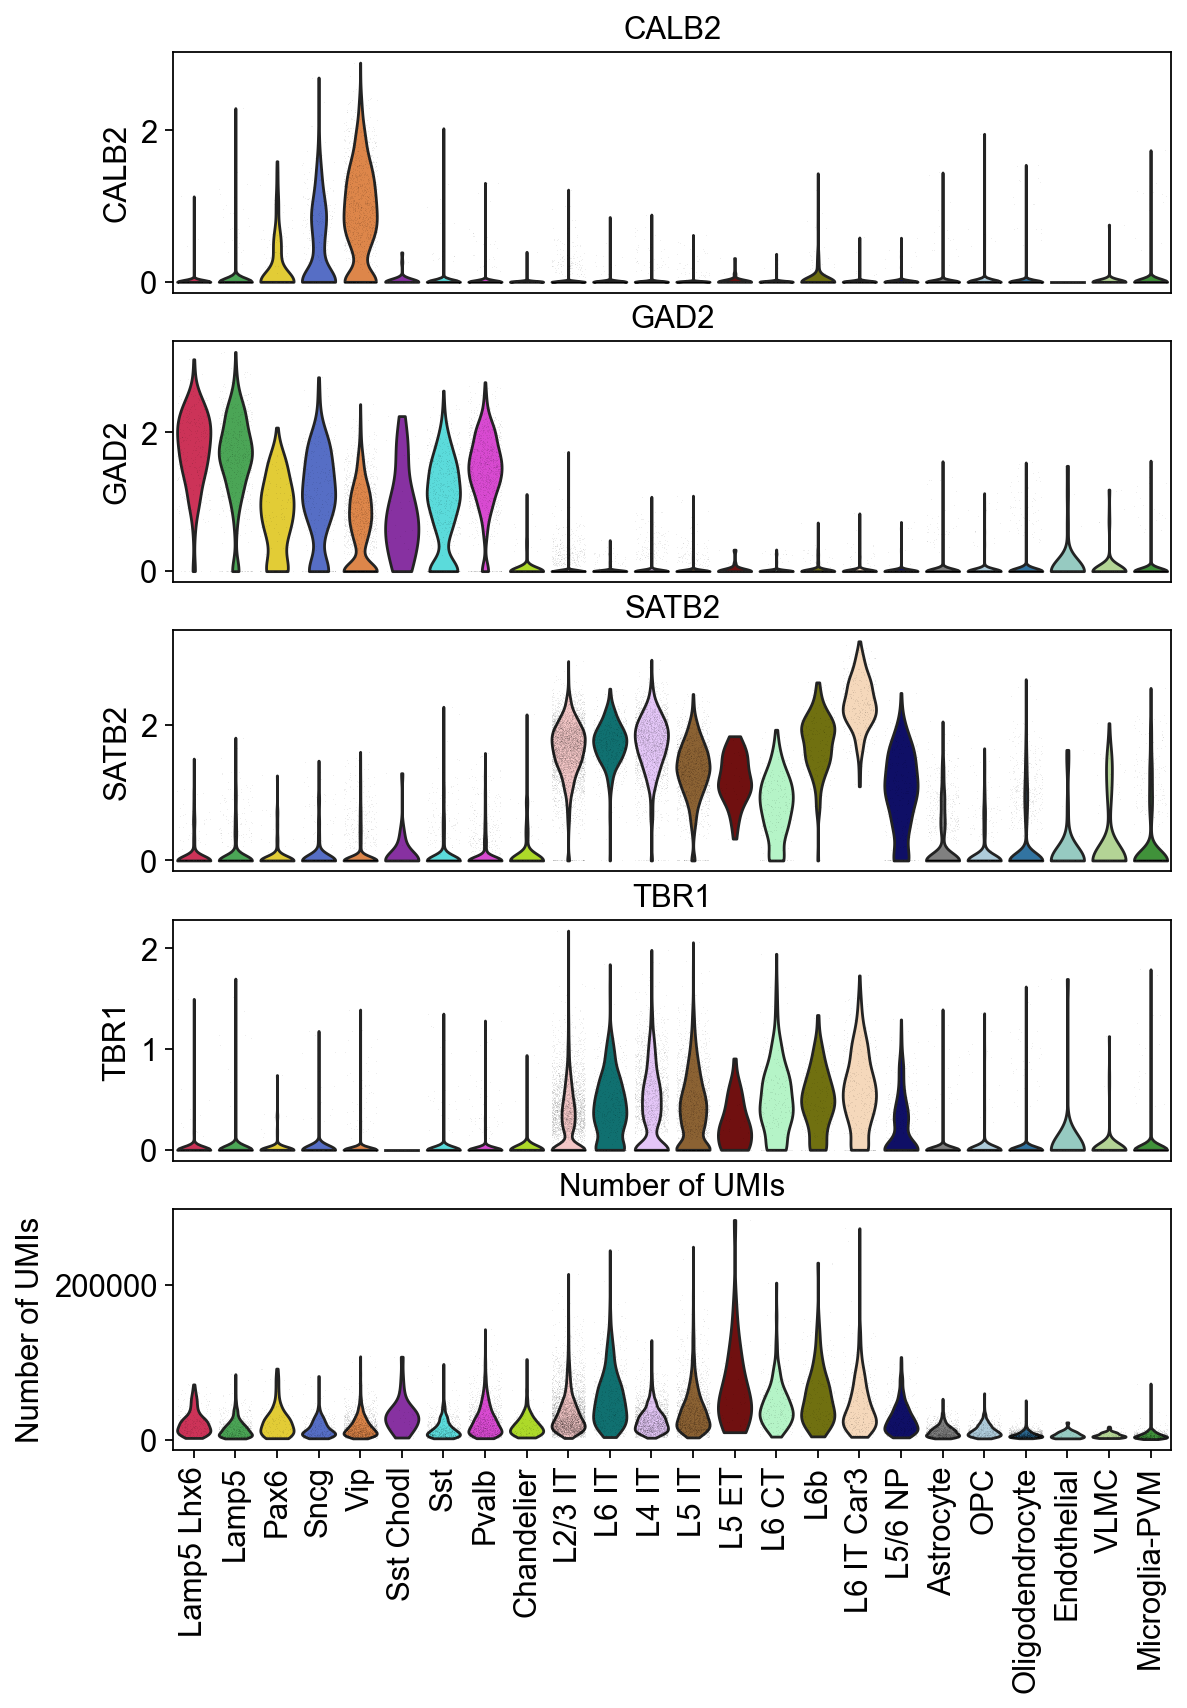

Figure saved to: ./violin_plot_piaso.pdf


In [25]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
                              width_single=8,
                              height_single=2.3,
                              groupby='Subclass',
                              show_grid=False,
                              save='./violin_plot_piaso.pdf')